### k-Nächste Nachbarn Verfahren auf dem MNIST Datensatz aus Sklearn
- 8x8 Pixel Bilder handgeschriebener amerikanischer Ziffern

#### Versionsgeschichte

- 1.0 21.09.2023 Willi Hahn Initialversion
    Nach https://www.kaggle.com/code/jonathankristanto/mnist-classification-using-multilayer-perceptron.
    Angepasst für neue Sklearn Version, siehe ConfusionMatrixDisplay.
      


In [1]:
# Bibliotheken laden
# falls noch nicht installiert, siehe Vorlesung 3
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, validation_curve, learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay


scriptname='MNIST kNN 8x8.ipynb'
logtext=""
import logging
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)
logging.basicConfig(
    force=True,
    level=logging.INFO,
    format="%(asctime)s;%(levelname)s;%(message)s;",
    datefmt="%Y-%m-%d %H:%M:%S",
    encoding='utf-8',
    filename="AllScripts.log"
)
logger = logging.getLogger()


In [2]:
# Daten einlesen. Sie sind bereits in der Sklearn Bibliothek als "Hello World" Beispiel
digits = datasets.load_digits()

Images (x) Shape : (1797, 8, 8)
Target (y) Shape : (1797,)


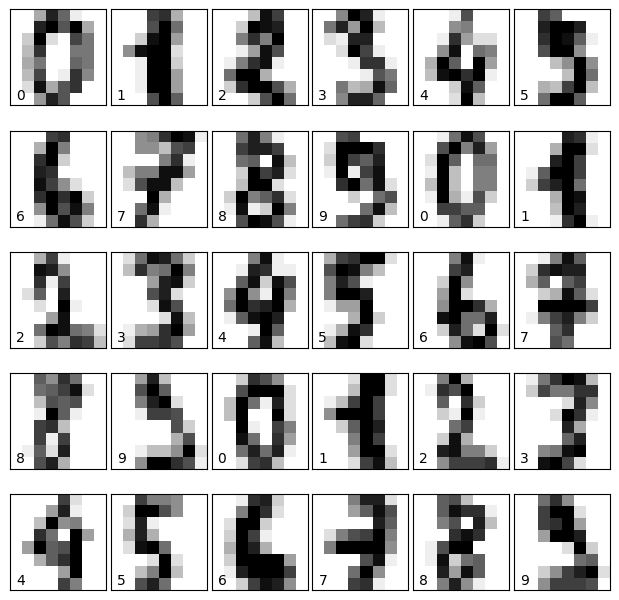

In [3]:
X = digits['images']
y = digits['target']
target_names = digits['target_names']
print(f'Images (x) Shape : {X.shape}')
print(f'Target (y) Shape : {y.shape}')

# Display sample data
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(30):
    ax = fig.add_subplot(5, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(X[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(y[i]))

In [4]:
# 8x8 Matrix als 64-stelligen Vektor wandeln
n_samples = len(X)
X = X.reshape((n_samples, -1))
print(f"After reshape = {X.shape}")
print (X)

After reshape = (1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [5]:
# Traiinings-/ Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
print(X_train.shape)
print(X_test.shape)

(1437, 64)
(360, 64)


In [6]:
# k-NN Modell berechnen
# siehe https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
N_NEIGHBORS = 1
WEIGHTS='uniform'

knn = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, weights=WEIGHTS, n_jobs=-1)
knn.fit(X_train, y_train)

acc_train = knn.score(X_train, y_train)
acc_test = knn.score(X_test, y_test)          
print(f'Train Accuracy = {acc_train}')
print(f'Test Accuracy = {acc_test}')

logger.info(scriptname + ';' + f'{acc_train:3.2f}' + ";" + f'{acc_test:3.2f}'+ ";" )

Train Accuracy = 1.0
Test Accuracy = 0.9888888888888889


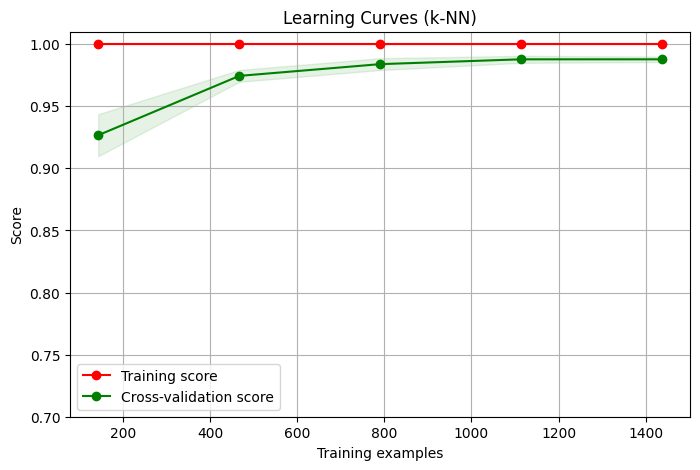

In [7]:
# Lernkurve zeichnen

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(8, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    # siehe https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    return plt

title = "Learning Curves (k-NN)"

# Cross validation with 5 iterations each time with 20% data 
# randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

plot_learning_curve(knn, title, X, y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=-1)

plt.show()

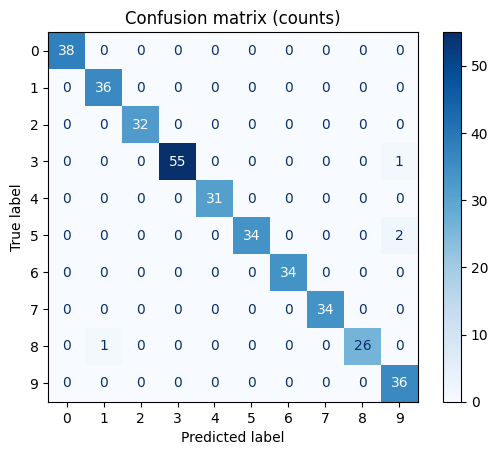

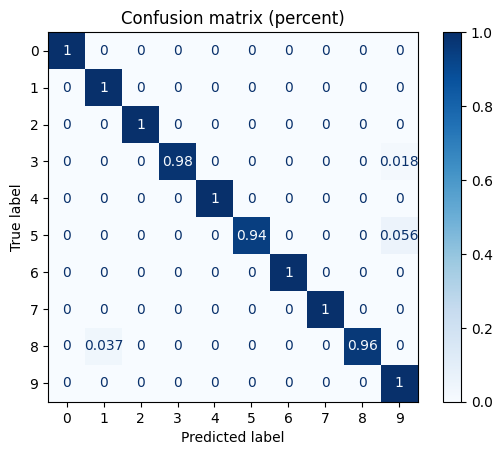

In [8]:
# Wahrheitsmatrix
titles_options = [
    ("Confusion matrix (counts)", None),
    ("Confusion matrix (percent)", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        knn,
        X_test,
        y_test,
        display_labels=target_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

plt.show()

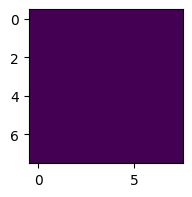

Erwartet wird nichts, vorhergesagt wird [7]
Wahrscheinlichkeiten für 0,1,2,..9 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


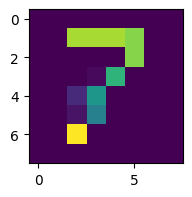

Erwartet wird 7, vorhergesagt wird [7]
Wahrscheinlichkeiten für 0,1,2,..9 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


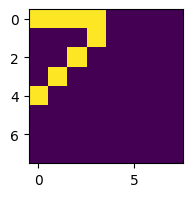

Erwartet wird 7, vorhergesagt wird [5]
Wahrscheinlichkeiten für 0,1,2,..9 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


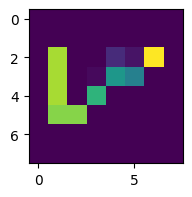

Erwartet wird 7, vorhergesagt wird [4]
Wahrscheinlichkeiten für 0,1,2,..9 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [9]:
# Test neuer Ziffern

# Als Test werden hier Ziffern mit der hand codiert. Der Einfachheit halber
# als array von 64 Grauwerte zwischen 0 und 255. Dazu wurde auf Papier
# eine Gitter mit 8x8 Zellen gezeichnet, darauf eine Ziffer und dann zeilenweise
# von links oben beginnend als ein Python array hingeschrieben.
#
# zuerst eine Nullmatrix als Vorlage
# zuerst eine Nullmatrix als Vorlage

def check_digit (X, Y):
    plt.figure(figsize=(2,2))
    plt.imshow(X)
    plt.show()
    X = X.reshape(1,-1)
    target = knn.predict(X)
    print ("Erwartet wird "+str(Y)+", vorhergesagt wird "+ str (target))
    np.set_printoptions(precision=3)
    np.set_printoptions(suppress=True)
    print ("Wahrscheinlichkeiten für 0,1,2,..9 " + str (knn.predict_proba(X)))



test = np.array ([[ 0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0]])
test7 = np.array([[ 0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  200,  200,  200,  188,  0,  0],
        [0,  0,  0,  0,  0,  188,  0,  0],
        [0,  0,  0,  6,  150,  0,  0,  0],
        [0,  0,  28,  122,  0,  0,  0,  0],
        [0,  0,  12,  100,  0,  0,  0,  0],
        [0,  0,  230,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0]])

test_small7 = np.array ([[ 200,   200,   200,  200,  0,  0,  0,  0],
        [0,  0,   0,  200,  0,  0,  0,  0],
        [0,  0,   200,  0,  0,  0,  0,  0],
        [0,   200,  0,  0,  0,  0,  0,  0],
        [ 200,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0]])

test_template = np.array ([[ 0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0]])

check_digit (test,"nichts")
check_digit (test7,7)
check_digit (test_small7,7)
# Test einer gedrehten 7
check_digit (test7.transpose(),7)
